In [ ]:
# df['date_time']=pd.to_datetime(df['date_time'],format='mixed')
# df['day'] = df['date_time'].dt.day_name()
# df['month'] = df['date_time'].dt.month
# df['year'] = df['date_time'].dt.year
# df['hour'] = df['date_time'].dt.hour
# df.drop('date_time',axis=1,inplace = True)
# df.head()

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 65.4MB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

from statsmodels.tsa.seasonal import seasonal_decompose



In [359]:
df = pd.read_csv('/content/Traffic Data.csv') # , parse_dates=['date_time'], index_col='date_time'
df.head()


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [360]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [361]:
# df['date_time'] = pd.to_datetime(df['date_time'])
# df['hourly'] = df['date_time'].dt.hour

In [362]:
# df.sort_values(by='hourly',inplace=True)
# df.sort_values(by='date_time',inplace=True)

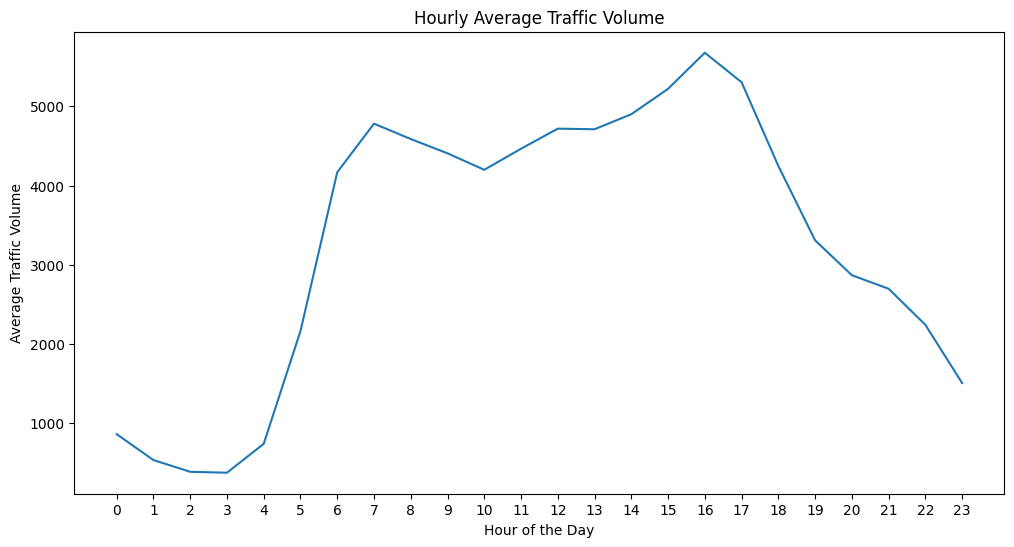

In [363]:

df['date_time'] = pd.to_datetime(df['date_time'])


df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

hourly_traffic = df.groupby('hour')['traffic_volume'].mean()


fig, ax = plt.subplots(figsize=(12, 6))

hourly_traffic.plot(ax=ax)
ax.set_title('Hourly Average Traffic Volume')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Traffic Volume')
ax.set_xticks(range(0, 24))

plt.show()

In [364]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day,month,year
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,1,27,8,2017
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,23,6,9,2018
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,18,25,8,2017
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,22,9,11,2017
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,15,9,11,2017


In [365]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day,month,year
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,1,27,8,2017
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,23,6,9,2018
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,18,25,8,2017
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,22,9,11,2017
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,15,9,11,2017


In [366]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'hour', 'day',
       'month', 'year'],
      dtype='object')

In [367]:
df.shape

(20000, 12)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
 8   hour                 20000 non-null  int32         
 9   day                  20000 non-null  int32         
 10  month                20000 non-null  int32         
 11  year                 20000 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(4), int64(1), object(2)
memory usage: 1.5+ MB


In [369]:
df['date_time'].min(), df['date_time'].max()

(Timestamp('2016-11-18 15:00:00'), Timestamp('2018-09-30 23:00:00'))

In [370]:
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [371]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,18,11,2016


In [372]:
df.isna().sum()

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
hour                    0
day                     0
month                   0
year                    0
dtype: int64

In [373]:
df.traffic_volume.mean()

3278.186886886887

In [374]:
df.dropna(subset=['traffic_volume'],inplace = True)

In [375]:
df.isna().sum()

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
hour                   0
day                    0
month                  0
year                   0
dtype: int64

In [376]:
df.duplicated().sum()

12

In [377]:
df.drop_duplicates(inplace = True)

In [378]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

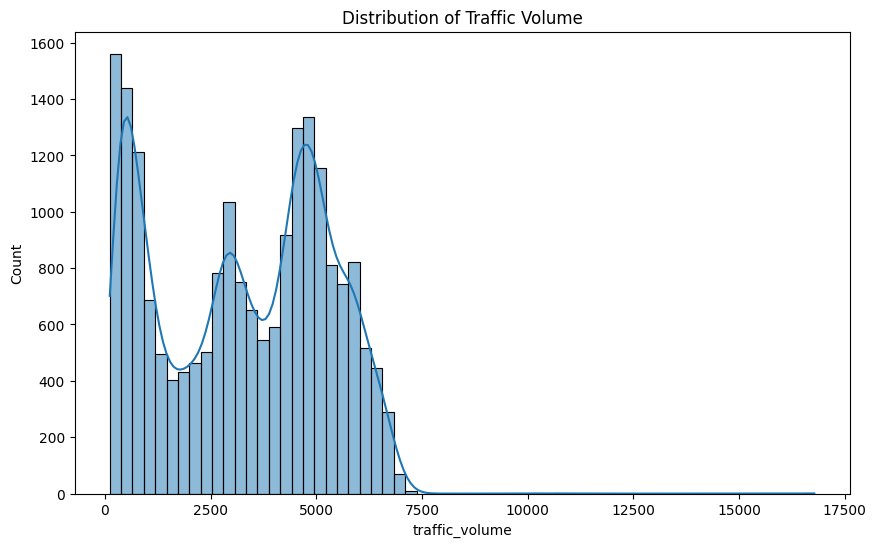

In [379]:

#Histogram Plot
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

In [380]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,18,11,2016


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  object 
 6   weather_description  19968 non-null  object 
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 1.5+ MB


In [382]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  object 
 6   weather_description  19968 non-null  object 
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(1), object(2)
memory usage: 1.5+ MB


In [384]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,15,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,16,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,16,18,11,2016


In [385]:
df['weather_main'].unique()

array(['Snow', 'Fog', 'Mist', 'Haze', 'Clouds', 'Clear', 'Rain',
       'Drizzle', 'Thunderstorm', 'Smoke'], dtype=object)

In [386]:
df['weather_description'].unique()

array(['heavy snow', 'fog', 'mist', 'light snow', 'haze',
       'overcast clouds', 'sky is clear', 'broken clouds',
       'scattered clouds', 'few clouds', 'light rain', 'moderate rain',
       'light intensity drizzle', 'snow', 'freezing rain',
       'shower drizzle', 'drizzle', 'proximity thunderstorm',
       'heavy intensity rain', 'proximity shower rain', 'thunderstorm',
       'light shower snow', 'Sky is Clear', 'sleet',
       'thunderstorm with heavy rain', 'heavy intensity drizzle',
       'light rain and snow', 'thunderstorm with light rain',
       'proximity thunderstorm with rain',
       'thunderstorm with light drizzle',
       'proximity thunderstorm with drizzle',
       'light intensity shower rain', 'thunderstorm with rain', 'smoke'],
      dtype=object)

In [387]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['weather_main'] = le.fit_transform(df['weather_main'])

In [388]:
df['weather_description'] = le.fit_transform(df['weather_description'])

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  int64  
 6   weather_description  19968 non-null  int64  
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 1.5 MB


In [390]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16,15,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4,16,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16,16,18,11,2016


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  int64  
 6   weather_description  19968 non-null  int64  
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 1.5 MB


In [392]:
df.corr().loc['traffic_volume']

traffic_volume         1.000000
temp                   0.131968
rain_1h                0.012818
snow_1h                     NaN
clouds_all             0.094471
weather_main          -0.050717
weather_description   -0.086858
hour                   0.355643
day                    0.000478
month                  0.002130
year                   0.018435
Name: traffic_volume, dtype: float64

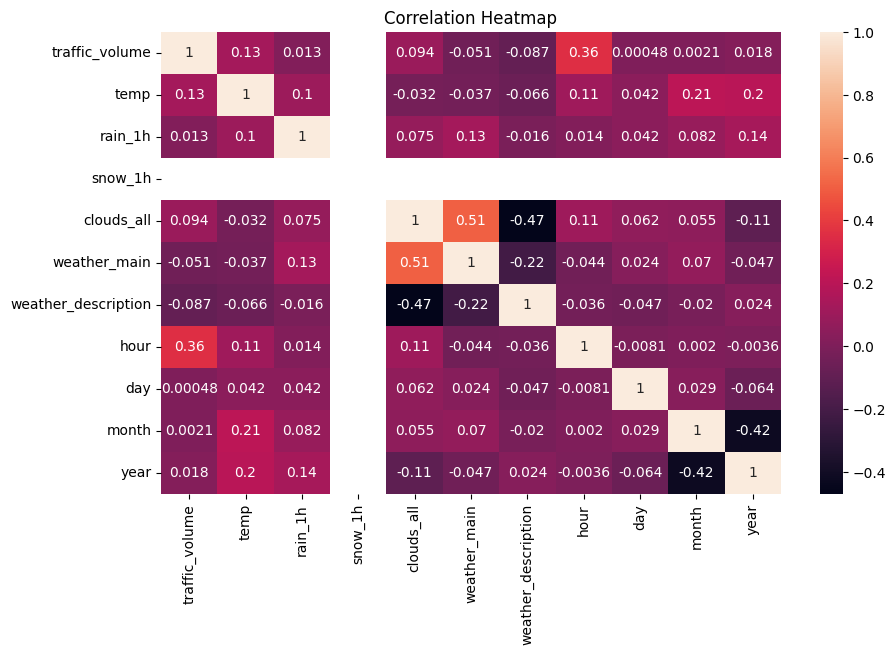

In [393]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

<Axes: title={'center': 'traffic_volume'}, xlabel='date_time'>

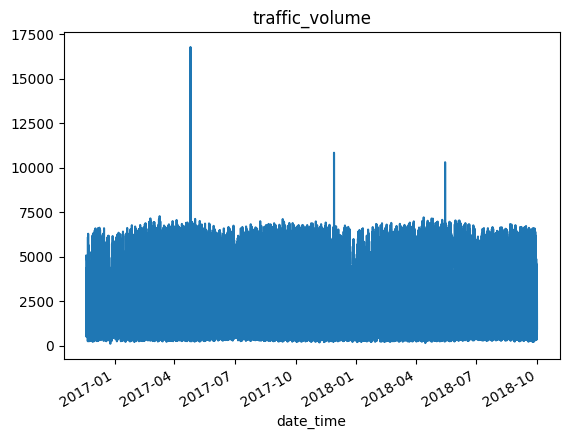

In [394]:

df['traffic_volume'].plot(title='traffic_volume')

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [395]:
# Shift Method: Use the shift method to create a new column prev_traffic_volume, which represents the previous day's traffic volume.
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

print(df[['traffic_volume', 'prev_traffic_volume']].head())

                     traffic_volume  prev_traffic_volume
date_time                                               
2016-11-18 15:00:00          4872.0                  NaN
2016-11-18 15:00:00          4872.0               4872.0
2016-11-18 15:00:00          4872.0               4872.0
2016-11-18 16:00:00          5074.0               4872.0
2016-11-18 16:00:00          5074.0               5074.0


In [396]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'hour', 'day', 'month', 'year',
       'prev_traffic_volume'],
      dtype='object')

In [397]:
df.drop(axis = 1 ,columns='prev_traffic_volume' ,inplace=True)

In [398]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day,month,year
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,8,9,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3,4,15,18,11,2016
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,5,16,15,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3,4,16,18,11,2016
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,5,16,16,18,11,2016


In [399]:
features = ['temp', 'weather_main', 'weather_description','clouds_all']
target = ['traffic_volume']

KeyboardInterrupt: 

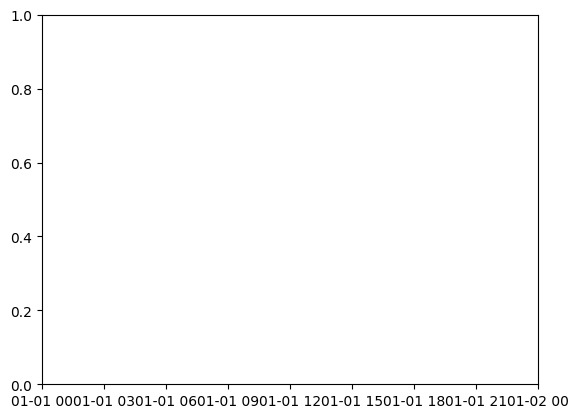

In [400]:
# It Took Long time to run

for feature in features:
  sns.lineplot(df[feature])
  plt.show()
sns.lineplot(df[target])
plt.show()

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  int64  
 6   weather_description  19968 non-null  int64  
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 1.5 MB


In [ ]:
# df.reset_index(inplace=True)
# print(df.head())  # Now the 'date_time' will be a column again

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  int64  
 6   weather_description  19968 non-null  int64  
 7   hour                 19968 non-null  int32  
 8   day                  19968 non-null  int32  
 9   month                19968 non-null  int32  
 10  year                 19968 non-null  int32  
dtypes: float64(4), int32(4), int64(3)
memory usage: 1.5 MB


In [403]:
result = seasonal_decompose(df['traffic_volume'], period=7,model='multiplicative')

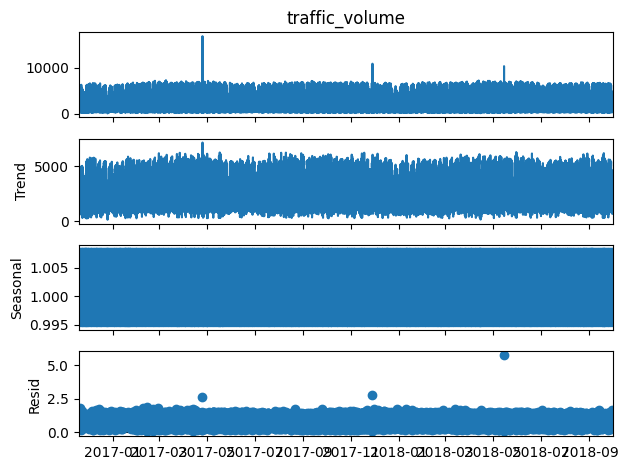

In [404]:
result.plot()
plt.show()

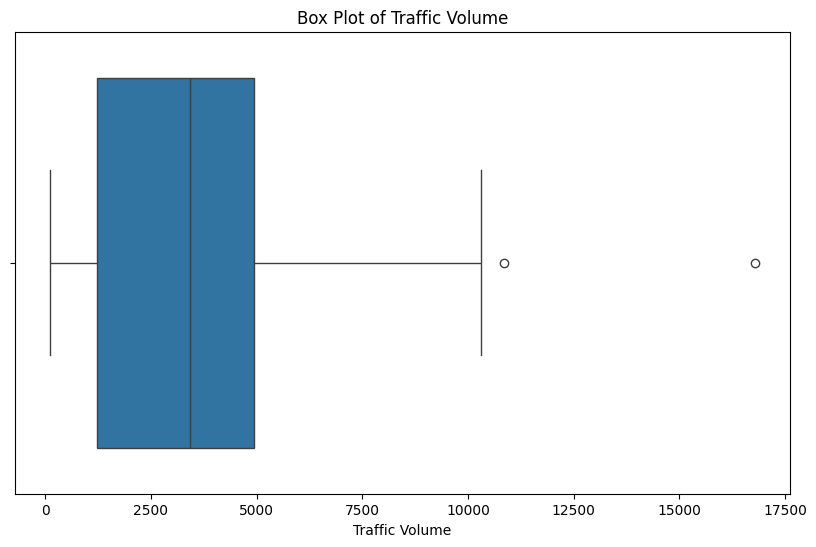

In [438]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['traffic_volume'])
plt.title('Box Plot of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

In [405]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [406]:
df.drop(axis = 1 ,columns='hour' ,inplace=True)

In [407]:
df.drop(axis = 1 ,columns='day' ,inplace=True)

In [408]:
df.drop(axis = 1 ,columns='month' ,inplace=True)
df.drop(axis = 1 ,columns='year' ,inplace=True)
df.drop(axis = 1 ,columns='snow_1h' ,inplace=True)
df.drop(axis = 1 ,columns='rain_1h' ,inplace=True)


In [409]:
df.columns

Index(['traffic_volume', 'temp', 'clouds_all', 'weather_main',
       'weather_description'],
      dtype='object')

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   clouds_all           19968 non-null  int64  
 3   weather_main         19968 non-null  int64  
 4   weather_description  19968 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 936.0 KB


In [411]:
from sklearn.preprocessing import MinMaxScaler

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [412]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

In [416]:
scaler = MinMaxScaler()

# Scale the training data
train_scaled = scaler.fit_transform(train_data[['traffic_volume', 'temp', 'clouds_all',
                                                'weather_main', 'weather_description']])

# Scale the validation data (using the same scaler fitted on training data)
val_scaled = scaler.transform(val_data[['traffic_volume', 'temp', 'clouds_all',
                                        'weather_main', 'weather_description']])

# Scale the testing data (using the same scaler fitted on training data)
test_scaled = scaler.transform(test_data[['traffic_volume', 'temp', 'clouds_all',
                                          'weather_main', 'weather_description']])

In [417]:
win_size = 30


train_ds = timeseries_dataset_from_array(
    data=train_scaled,
    targets=train_scaled[win_size:, 0],
    sequence_length=win_size,
    batch_size=32
)


val_ds = timeseries_dataset_from_array(
    data=val_scaled,
    targets=val_scaled[win_size:, 0],
    sequence_length=win_size,
    batch_size=32
)


test_ds = timeseries_dataset_from_array(
    data=test_scaled,
    targets=test_scaled[win_size:, 0],
    sequence_length=win_size,
    batch_size=32
)


for batch in train_ds.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)

Input shape: (32, 30, 5)
Target shape: (32,)


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [419]:
for batch in train_ds.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)

Input shape: (32, 30, 5)
Target shape: (32,)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [420]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=50, return_sequences=True))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(units=1))
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [421]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [422]:
RNN_history = RNN_model.fit(train_ds, epochs=30, validation_data=val_ds,callbacks=early_stopping)

Epoch 1/30
436/436 [==============================] - 12s 23ms/step - loss: 0.0719 - mae: 0.1955 - val_loss: 0.0042 - val_mae: 0.0506
Epoch 2/30
436/436 [==============================] - 10s 22ms/step - loss: 0.0132 - mae: 0.0898 - val_loss: 0.0031 - val_mae: 0.0407
Epoch 3/30
436/436 [==============================] - 11s 25ms/step - loss: 0.0066 - mae: 0.0638 - val_loss: 0.0025 - val_mae: 0.0365
Epoch 4/30
436/436 [==============================] - 10s 24ms/step - loss: 0.0047 - mae: 0.0530 - val_loss: 0.0022 - val_mae: 0.0332
Epoch 5/30
436/436 [==============================] - 10s 22ms/step - loss: 0.0036 - mae: 0.0467 - val_loss: 0.0020 - val_mae: 0.0316
Epoch 6/30
436/436 [==============================] - 10s 22ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0018 - val_mae: 0.0291
Epoch 7/30
436/436 [==============================] - 11s 25ms/step - loss: 0.0026 - mae: 0.0387 - val_loss: 0.0018 - val_mae: 0.0283
Epoch 8/30
436/436 [==============================] - 11s 25ms

In [423]:
from sklearn.metrics import mean_squared_error


predictions = RNN_model.predict(test_ds)


true_values = np.concatenate([y for x, y in test_ds], axis=0)


predictions = predictions[:len(true_values)]


mse = mean_squared_error(true_values, predictions)
print(f"Mean Squared Error on the test set: {mse}")

93/93 [==============================] - 2s 10ms/step
Mean Squared Error on the test set: 0.000831237360543491


93/93 [==============================] - 1s 13ms/step


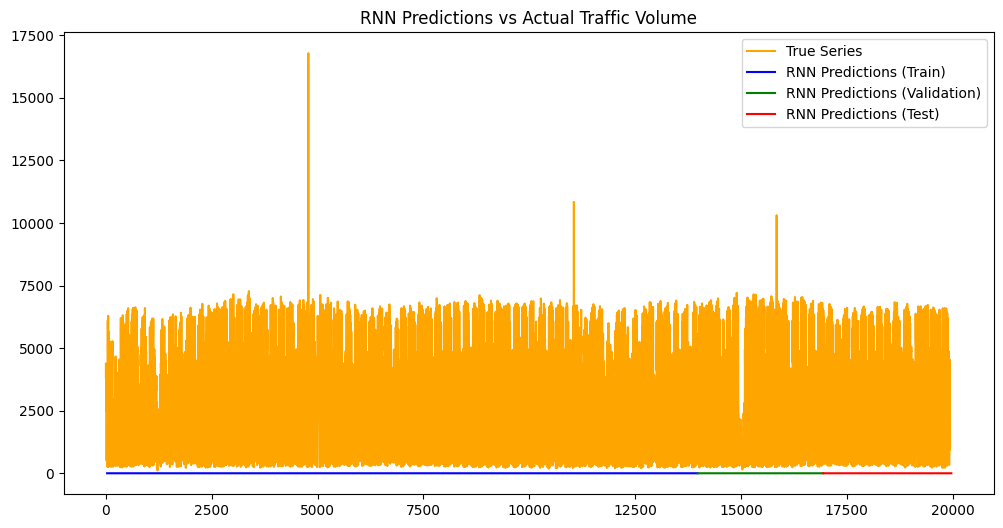

In [437]:
# I have an issue with the graphs
import numpy as np
import matplotlib.pyplot as plt


rnn_arr = np.zeros(len(df))
rnn_arr[:win_size] = np.nan

rnn_predictions_train = RNN_model.predict(train_ds).flatten()
rnn_predictions_val = RNN_model.predict(val_ds).flatten()
rnn_predictions_test = RNN_model.predict(test_ds).flatten()


rnn_arr[win_size:len(rnn_predictions_train)+win_size] = rnn_predictions_train
rnn_arr[len(rnn_predictions_train)+win_size:len(rnn_predictions_train)+len(rnn_predictions_val)+win_size] = rnn_predictions_val
rnn_arr[len(rnn_predictions_train)+len(rnn_predictions_val)+win_size:len(rnn_predictions_train)+len(rnn_predictions_val)+len(rnn_predictions_test)+win_size] = rnn_predictions_test


plt.figure(figsize=(12, 6))


plt.plot(df.iloc[win_size:, 0].values, label='True Series', color='orange')


plt.plot(rnn_arr[:len(rnn_predictions_train)+win_size], label='RNN Predictions (Train)', color='blue')


plt.plot(np.arange(len(rnn_predictions_train)+win_size, len(rnn_predictions_train)+len(rnn_predictions_val)+win_size),
         rnn_arr[len(rnn_predictions_train)+win_size:len(rnn_predictions_train)+len(rnn_predictions_val)+win_size],
         label='RNN Predictions (Validation)', color='green')


plt.plot(np.arange(len(rnn_predictions_train)+len(rnn_predictions_val)+win_size, len(rnn_arr)),
         rnn_arr[len(rnn_predictions_train)+len(rnn_predictions_val)+win_size:],
         label='RNN Predictions (Test)', color='red')


plt.legend()
plt.title('RNN Predictions vs Actual Traffic Volume')
plt.show()


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [425]:
GRU_model = Sequential()
GRU_model.add(GRU(units=50))
GRU_model.add(Dropout(0.2))

GRU_model.add(Dense(units=1))

GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [426]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)




In [428]:
GRU_history = GRU_model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/10
436/436 [==============================] - 10s 23ms/step - loss: 0.0022 - mae: 0.0346 - val_loss: 0.0017 - val_mae: 0.0289
Epoch 2/10
436/436 [==============================] - 9s 21ms/step - loss: 0.0020 - mae: 0.0321 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 3/10
436/436 [==============================] - 10s 22ms/step - loss: 0.0018 - mae: 0.0308 - val_loss: 0.0015 - val_mae: 0.0274
Epoch 4/10
436/436 [==============================] - 19s 45ms/step - loss: 0.0017 - mae: 0.0291 - val_loss: 0.0015 - val_mae: 0.0264
Epoch 5/10
436/436 [==============================] - 9s 20ms/step - loss: 0.0016 - mae: 0.0283 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 6/10
436/436 [==============================] - 10s 24ms/step - loss: 0.0015 - mae: 0.0275 - val_loss: 0.0013 - val_mae: 0.0241
Epoch 7/10
436/436 [==============================] - 10s 24ms/step - loss: 0.0014 - mae: 0.0268 - val_loss: 0.0013 - val_mae: 0.0237
Epoch 8/10
436/436 [==============================] - 9s 20ms/st

In [429]:
gru_predictions_train = GRU_model.predict(train_ds).flatten()
gru_predictions_val = GRU_model.predict(val_ds).flatten()
gru_predictions_test = GRU_model.predict(test_ds).flatten()


true_values_train = np.concatenate([y for x, y in train_ds], axis=0)
true_values_val = np.concatenate([y for x, y in val_ds], axis=0)
true_values_test = np.concatenate([y for x, y in test_ds], axis=0)


gru_predictions_train = gru_predictions_train[:len(true_values_train)]
gru_predictions_val = gru_predictions_val[:len(true_values_val)]
gru_predictions_test = gru_predictions_test[:len(true_values_test)]


mse_test = mean_squared_error(true_values_test, gru_predictions_test)
print(f"Mean Squared Error on the test set: {mse_test}")

93/93 [==============================] - 1s 8ms/step
Mean Squared Error on the test set: 0.0008873075568570051


93/93 [==============================] - 2s 14ms/step


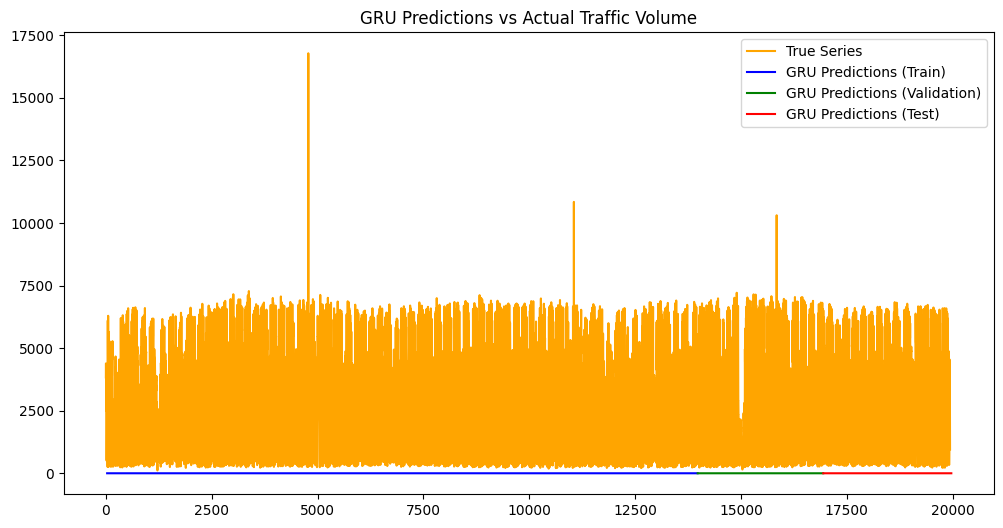

In [434]:
# I HAVE AN ISSUE WITH THE GRAPHS, BUT THAT IS MY SOLUTION

import numpy as np
import matplotlib.pyplot as plt


gru_arr = np.zeros(len(df))
gru_arr[:win_size] = np.nan


gru_predictions_train = GRU_model.predict(train_ds).flatten()
gru_predictions_val = GRU_model.predict(val_ds).flatten()
gru_predictions_test = GRU_model.predict(test_ds).flatten()


gru_arr[win_size:len(gru_predictions_train)+win_size] = gru_predictions_train
gru_arr[len(gru_predictions_train)+win_size:len(gru_predictions_train)+len(gru_predictions_val)+win_size] = gru_predictions_val
gru_arr[len(gru_predictions_train)+len(gru_predictions_val)+win_size:len(gru_predictions_train)+len(gru_predictions_val)+len(gru_predictions_test)+win_size] = gru_predictions_test


plt.figure(figsize=(12, 6))


plt.plot(df.iloc[win_size:, 0].values, label='True Series', color='orange')


plt.plot(np.arange(win_size, len(gru_predictions_train)+win_size),
         gru_arr[win_size:len(gru_predictions_train)+win_size], label='GRU Predictions (Train)', color='blue')


plt.plot(np.arange(len(gru_predictions_train)+win_size, len(gru_predictions_train)+len(gru_predictions_val)+win_size),
         gru_arr[len(gru_predictions_train)+win_size:len(gru_predictions_train)+len(gru_predictions_val)+win_size],
         label='GRU Predictions (Validation)', color='green')


plt.plot(np.arange(len(gru_predictions_train)+len(gru_predictions_val)+win_size, len(gru_arr)),
         gru_arr[len(gru_predictions_train)+len(gru_predictions_val)+win_size:],
         label='GRU Predictions (Test)', color='red')


plt.legend()
plt.title('GRU Predictions vs Actual Traffic Volume')
plt.show()


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:



Data Preprocessing: I dropped null valuse as it was approximately just 20 of 20000 missing values, and also i change date datatype and set to be the index

Feature Engineering: I encoded categorical features like weather conditions to provide the model with additional context about environmental factors affecting traffic volume.

Model Architecture: I used a GRU model with 50 units and a dropout layer for prevent overfitting, which is good for time series forecasting.

Training Process: I selected a batch size of 32 and used early stopping, with Adam optimizer

Loss Function and Metrics: I chose MSE for loss since minimizing errors was important, and MAE for metrics



Overfitting and Underfitting: the model was learning the mae were decreasing through the epochs

Future Improvements: I could explore adding more layers, experimenting with different recurrent architectures like LSTMs, and tuning hyperparameters more extensively for potential performance gains.